In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
488,489,0,3,"Somerton, Mr. Francis William",male,30.0,0,0,A.5. 18509,8.0500,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


In [7]:
df.shape

(891, 12)

this dataset contains the 891 rows and the 12 columns out that 1 ('survived') is our target variable

In [8]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 this dataset contains the 2 features of ('float64') and 5 features of ('int64') again 5 features of ('object') data types
and as we can see in this dataset  the ('age') feature is having only 714 values and ('cabin') feature is having 204 values and  ('Embarked') 889 and this dataset contains 891 rows it  means in this  features we have null values.

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length

In [12]:
df=df.drop('PassengerId',axis=1)

this are the datatypes which our dataset contains

In [13]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: >

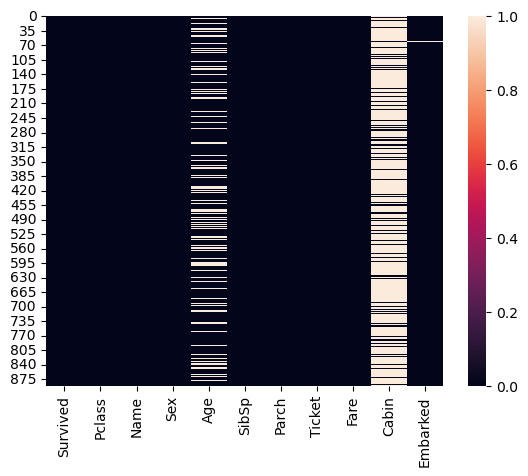

In [14]:
sns.heatmap(df.isnull())

heatmap has some white lines in ('age') and ('cabin') features this lines  represents  the null values, let's handle it by performing the Simple Imputer 

In [15]:
imp=SimpleImputer(strategy='mean')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))



In [16]:
imp=SimpleImputer(strategy='most_frequent')
df['Cabin']=imp.fit_transform(df['Cabin'].values.reshape(-1,1))
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

In [17]:
df.isnull().sum()


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

<Axes: >

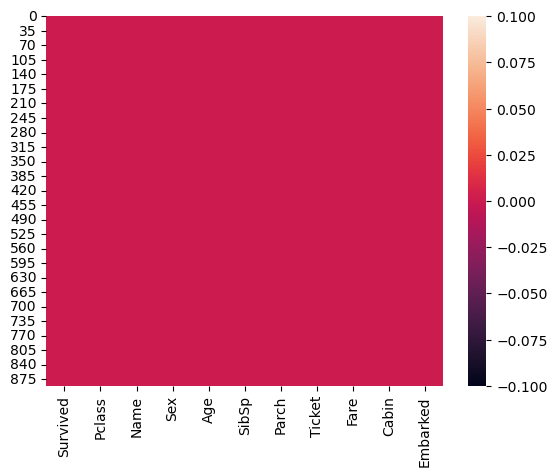

In [18]:
sns.heatmap(df.isnull())

we have resolved the issue of null values and now our heatmap is not having any white lines it is having only one single color that means we do not have any null values now 

In [19]:
for i in df.columns:
    print(df[i].nunique())
    print(df[i].name)

2
Survived
3
Pclass
891
Name
2
Sex
89
Age
7
SibSp
7
Parch
681
Ticket
248
Fare
147
Cabin
3
Embarked


In [20]:
df.nunique().to_frame()

,0
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248
Cabin,147


In [21]:
categorical_col=[]
numerical_col=[]

In [22]:
for i in df.dtypes.index:
    if df[i].dtypes=='object':
        categorical_col.append(i)
        
        
for i in df.dtypes.index:
    if df[i].dtypes!='object':
        numerical_col.append(i)
        
        
print('categorical_features',categorical_col)
print('numerical_features',numerical_col)
    

categorical_features ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numerical_features ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


here we have separeted the object features and the numeric features

In [23]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


in the describe method we can understand the standard deviation of the features and as well as there quartile range also.

in the ('sibsp') feature we can see  mean value is bit high than the median (50%) value it means this feature is right skewed
and also there is difference between their (75%) and the ('max') values there might be some outliers are present.

the ('parch') mean value is also high than the median(50%) value  again data points  are right skewed and difference between the (75%) and the ('max') is bit high it means there might be the outliers are presernt.

the ('fare') feature mean value is high than the median data points are right skewed there is much difference between there (75%) and the ('max') there might be the chance of presenting the outliers.


# Data Analysis

univariate

In [24]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S


0    549
1    342
Name: Survived, dtype: int64


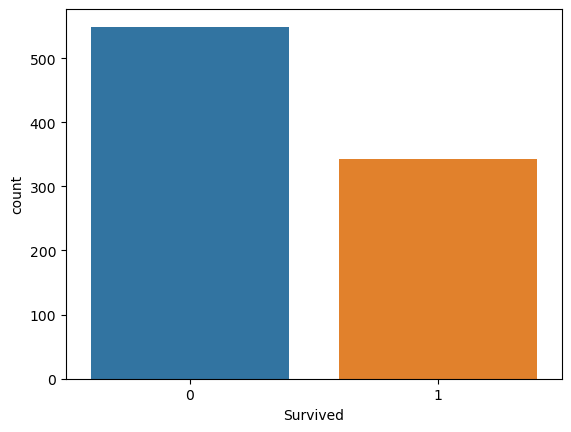

In [25]:
print(df['Survived'].value_counts())
sns.countplot(x='Survived',data=df)
plt.show()

in this countplot  0 repeted 549 times and 1 is  repeted 342 times it means  there is lot of people who did not survived because the value of 0 is high than the 1 and in this dataset 0 is representing the ('not survived') and 1 is representing the ('survived')

3    491
1    216
2    184
Name: Pclass, dtype: int64


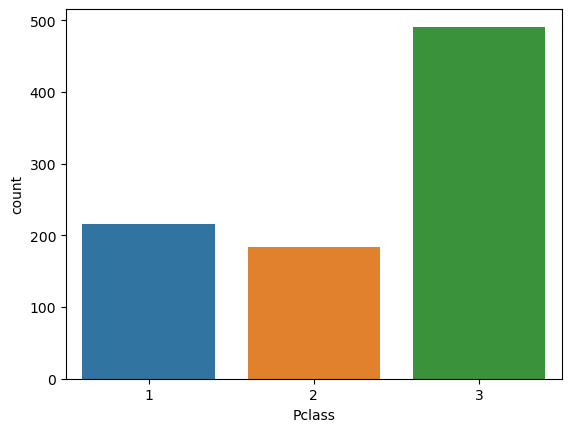

In [26]:
print(df['Pclass'].value_counts())
sns.countplot(x='Pclass',data=df)
plt.show()



in the ('pclass') more passenger were in the 3rd class and for the 1st and 2nd class there is very low passenger  than the 3rd class  

male      577
female    314
Name: Sex, dtype: int64


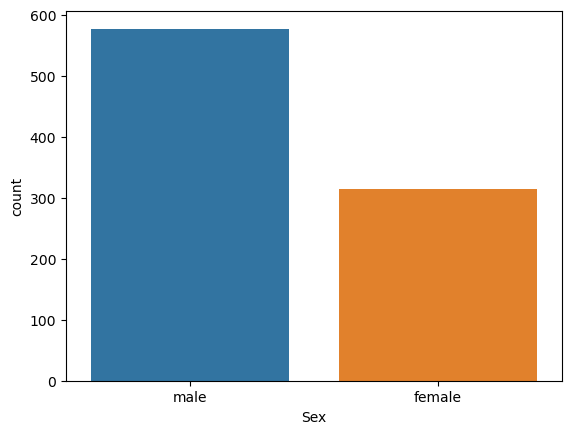

In [27]:
print(df['Sex'].value_counts())
sns.countplot(x='Sex',data=df)
plt.show()

the number of male is high than the female

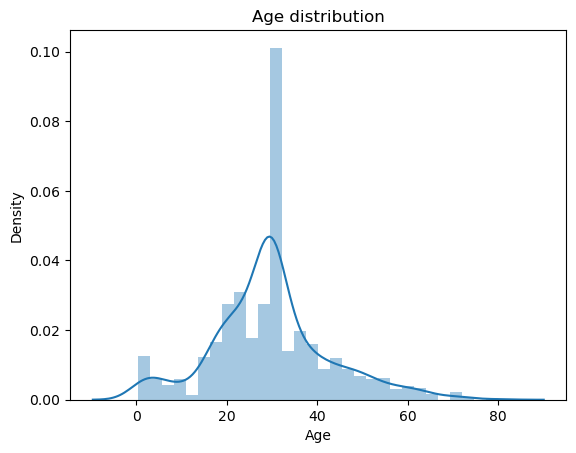

In [28]:
sns.distplot(df['Age'])
plt.title('Age distribution')
plt.show()


it is showing between 20 to 30  more values are lying and this feature is also looking almost normally distributed

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


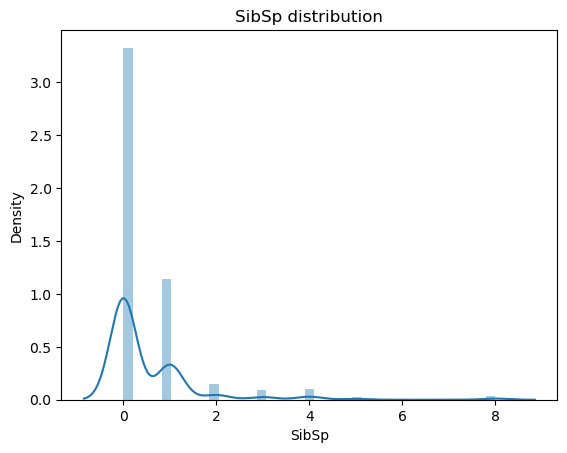

In [29]:
print(df['SibSp'].value_counts())

sns.distplot(df['SibSp'])
plt.title('SibSp distribution')
plt.show()

here data is left skewed and the frequency is highier on this 0 ('siblings')

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


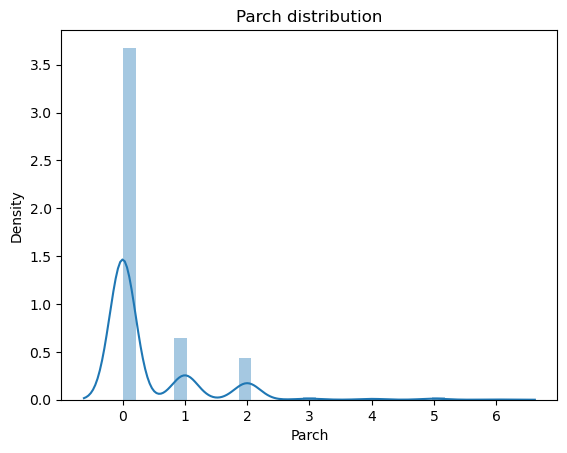

In [30]:
print(df['Parch'].value_counts())
sns.distplot(df['Parch'])
plt.title('Parch distribution')
plt.show()

data is left skewed the frequency is highier on the 0 value

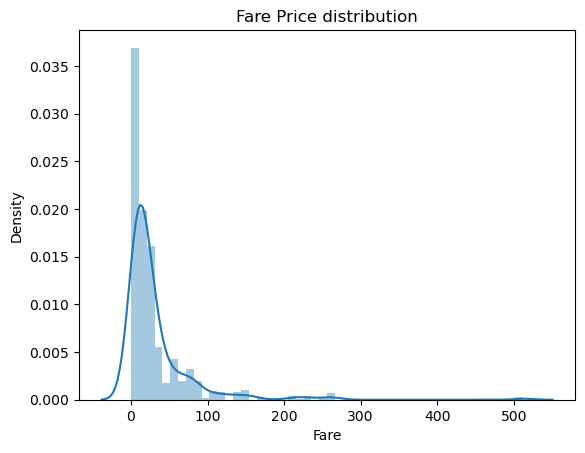

In [31]:
sns.distplot(df['Fare'])
plt.title('Fare Price distribution')
plt.show()

here also the dataset is left skewed and the most frequent ('Fare') price is between 0 to 50 

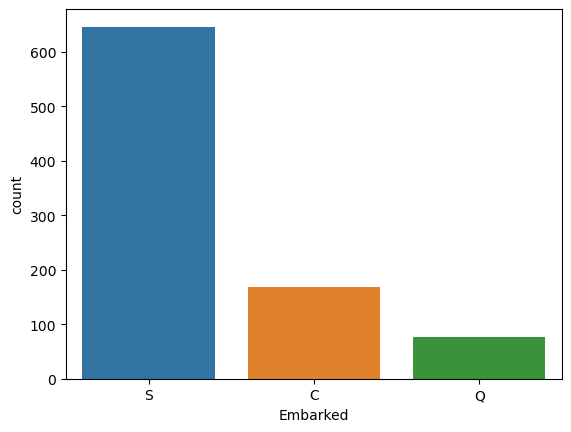

In [32]:
sns.countplot(x='Embarked',data=df)
plt.show()

# Biovariate analysis

In [33]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


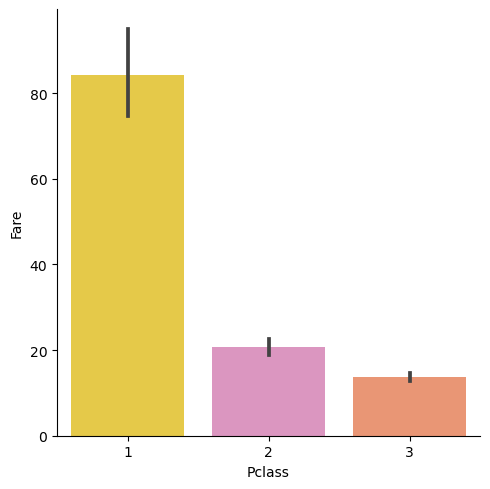

In [34]:
sns.catplot(x='Pclass',y='Fare',data=df,kind='bar',palette='Set2_r')
plt.show()

the fare price is much highier for the 1st class passenger than the 2nd and the 3rd class

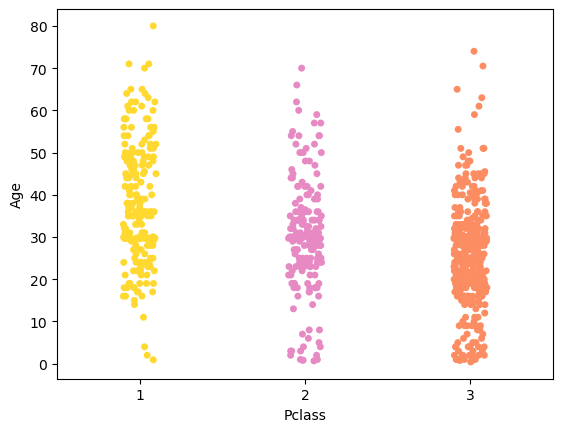

In [35]:
sns.stripplot(x='Pclass',y='Age',data=df,palette='Set2_r')
plt.show()

the more elder people present in the 1st class

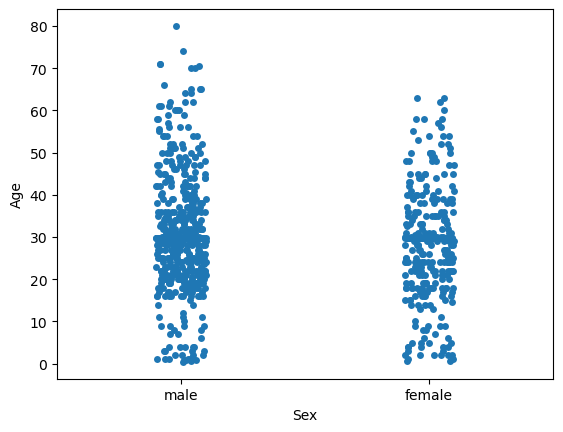

In [36]:
sns.stripplot(x='Sex',y='Age',data=df)
plt.show()

the Age of males is high than the females

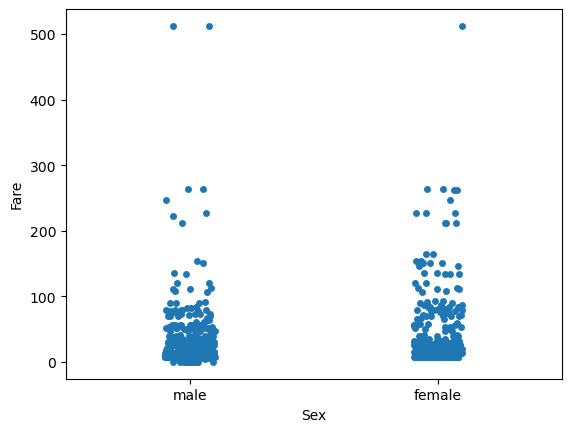

In [37]:
sns.stripplot(x='Sex',y='Fare',data=df)
plt.show()

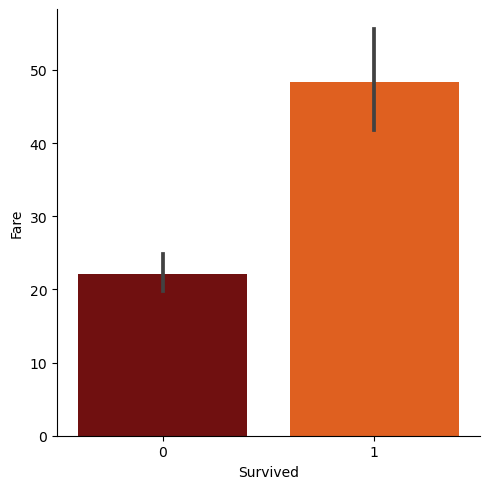

In [38]:
sns.catplot(x='Survived',y='Fare',data=df,kind='bar',palette='gist_heat')
plt.show()

the fare price is high for the 1st class passengers and most of the survived passenger were from the 1st class that.s why in this catplot the frequency is high on this 1('survived')

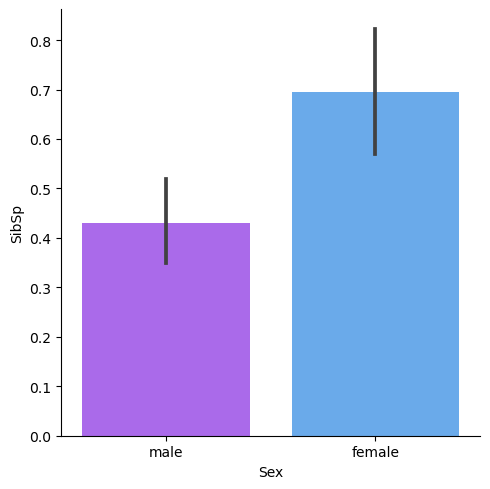

In [39]:
sns.catplot(x='Sex',y='SibSp',data=df,kind='bar',palette='cool_r')
plt.show()

here females are having more siblings than the males 

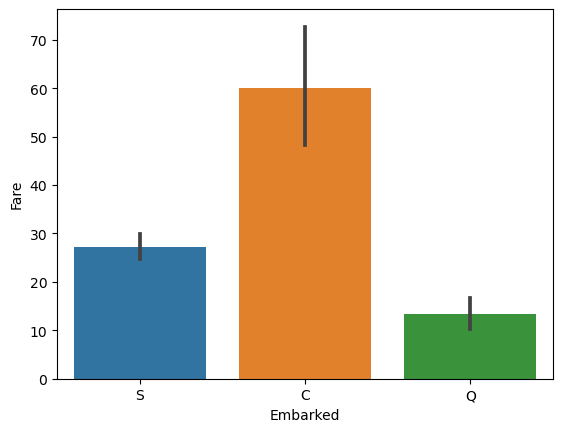

In [40]:
sns.barplot(x='Embarked',y='Fare',data=df)
plt.show()

hare we can see the 'Fare' price is high for the port of Embarkation on 'c'('Cherbourg')

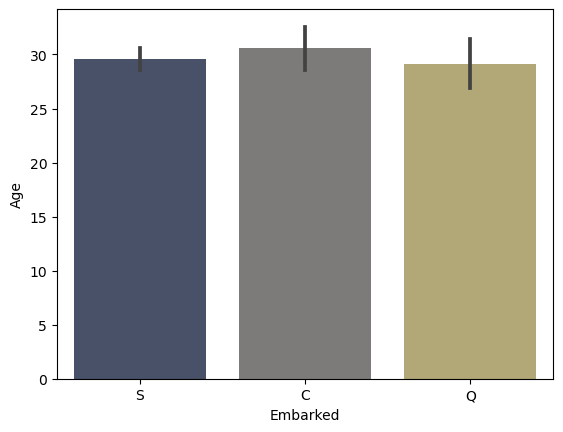

In [41]:
sns.barplot(x='Embarked',y='Age',data=df,palette='cividis')
plt.show()

we can understand from  the C ('Cherbourg') Embarked more elder people were traveling  

# multivariate Analysis

In [42]:
df.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
5,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,B96 B98,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S


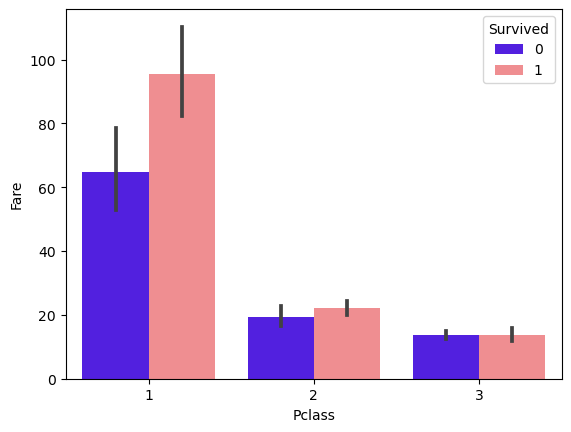

In [43]:
sns.barplot(x='Pclass',y='Fare',data=df,hue='Survived',palette='gnuplot2')
plt.show()

as we can see the survived ratio is high in the 1st class and for the 2nd and 3rd class is almost same and vary low

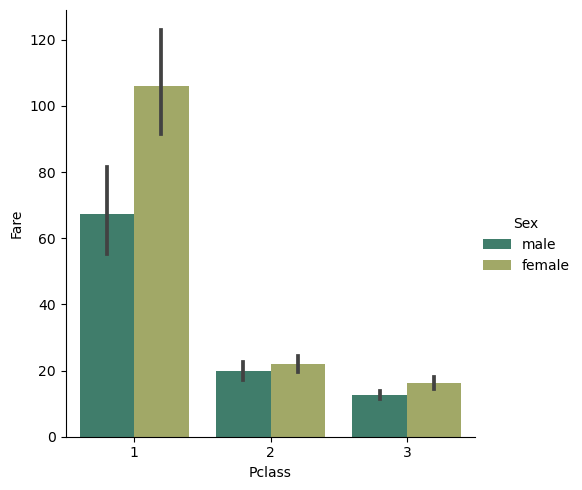

In [44]:
sns.catplot(x='Pclass',y='Fare',data=df,hue='Sex',kind='bar',palette='gist_earth')
plt.show()

the female survived rate is high for the first class

In [45]:
df.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
5,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,B96 B98,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S


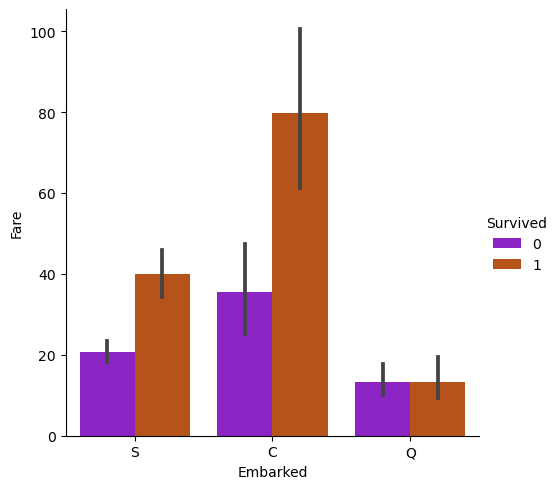

In [46]:
sns.catplot(x='Embarked',y='Fare',hue='Survived',data=df,kind='bar',palette='gnuplot')
plt.show()

we can observe in this plot the 'Fare' price is very high for the C('Cherbourg') it means most of the people from the C('cherbourg') they were tarveling in 1st class and in first class we have very good survived ratio because of the resources that were available in the first class.

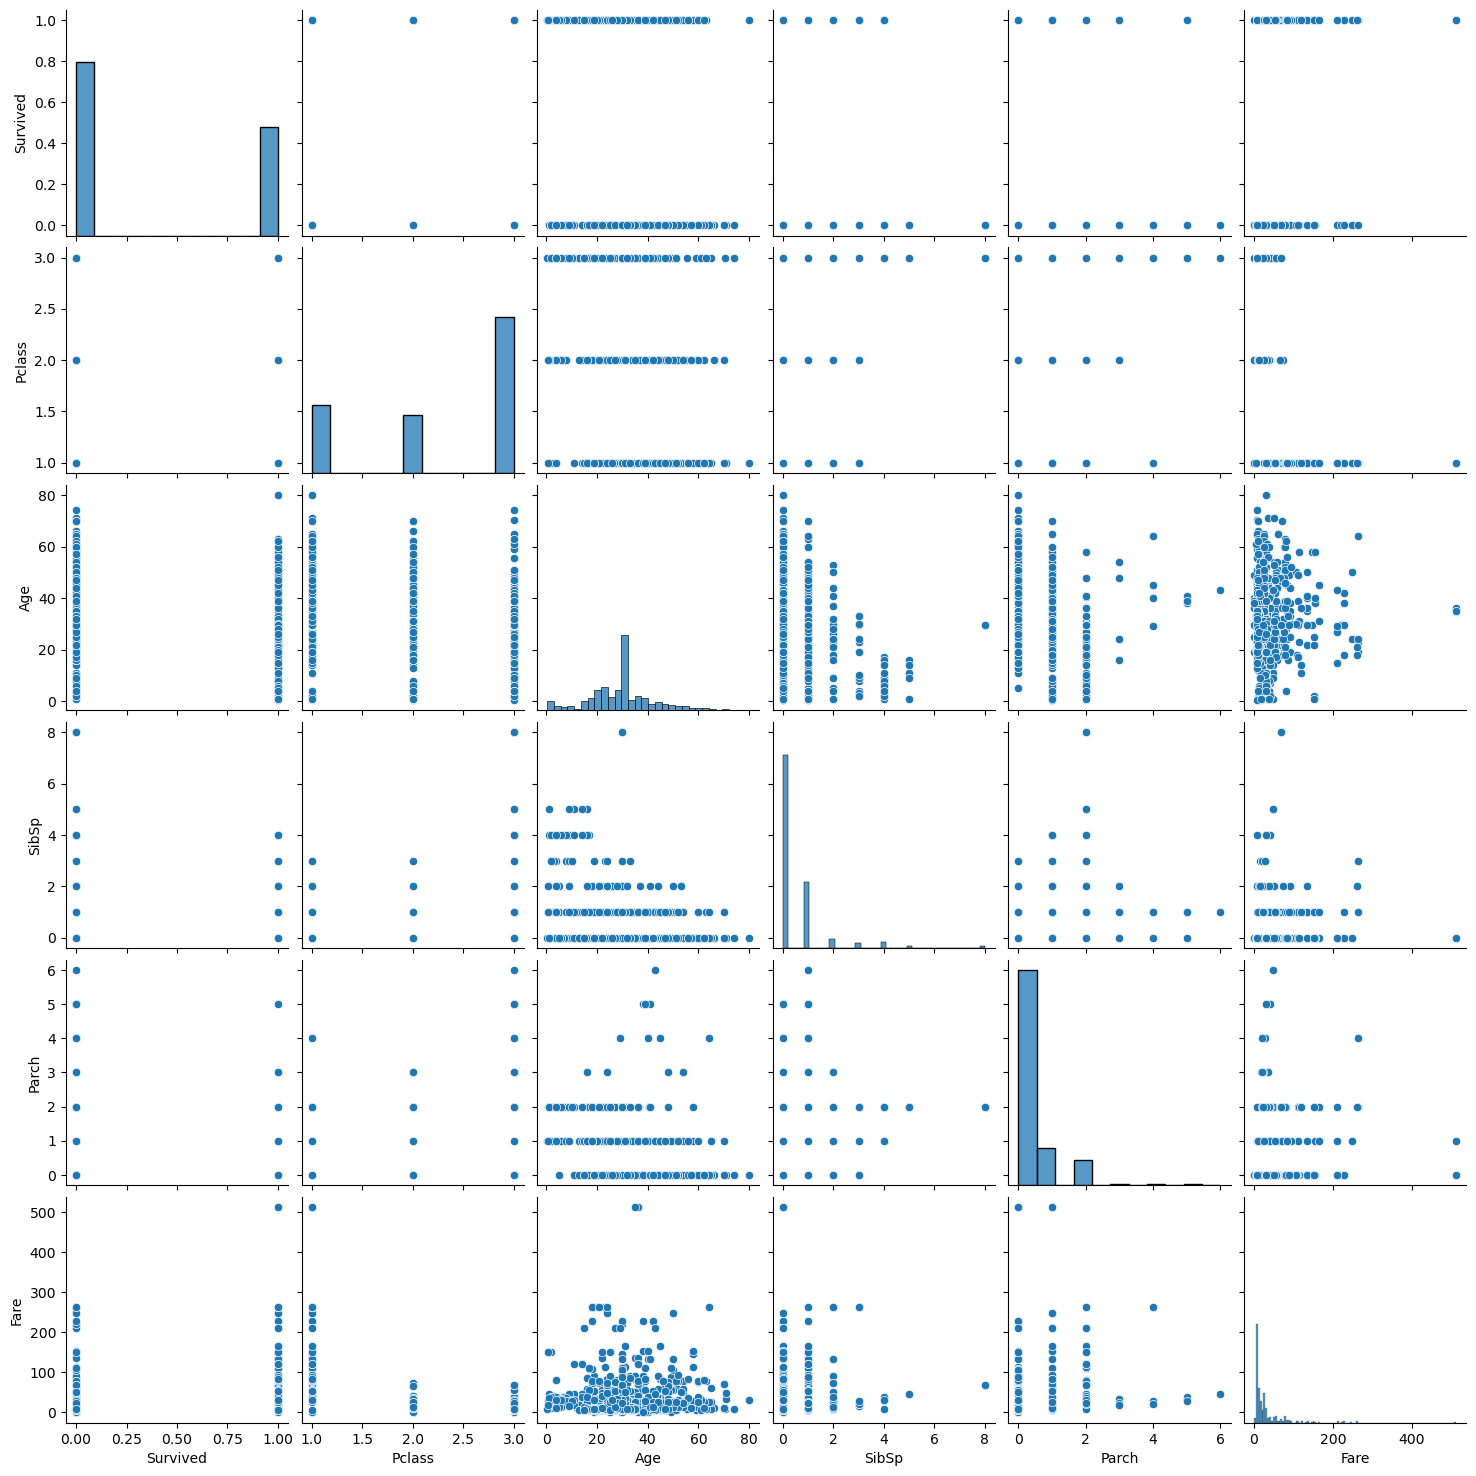

In [47]:
sns.pairplot(df)

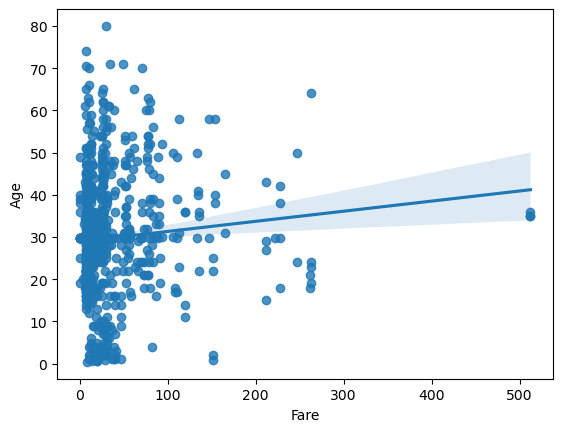

In [48]:
sns.regplot(x='Fare',y='Age',data=df)
plt.show()

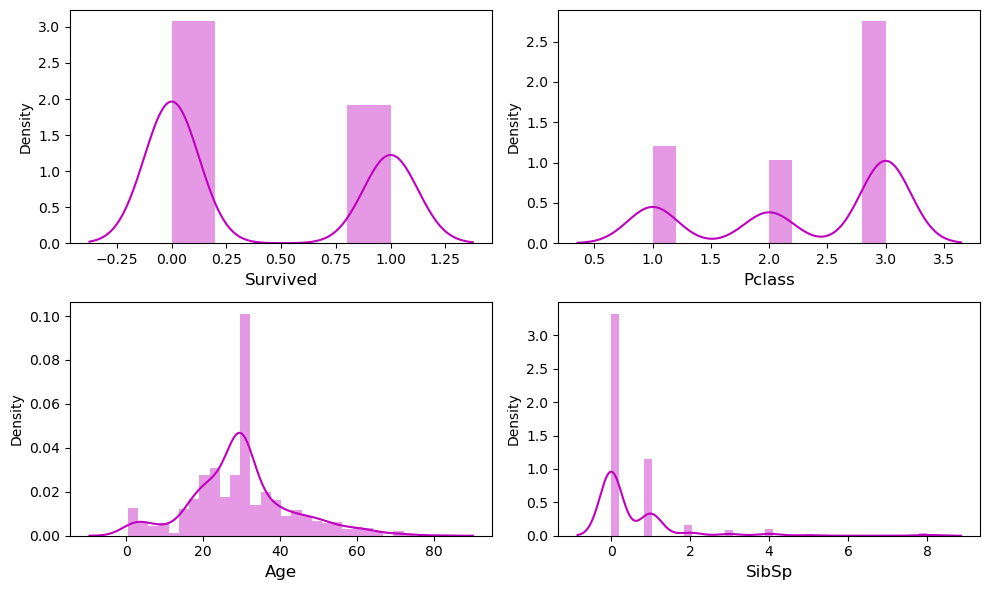

In [49]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2, plotnumber)
        sns.distplot(df[col],color= 'm')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    
    plotnumber+=1
plt.tight_layout()
    

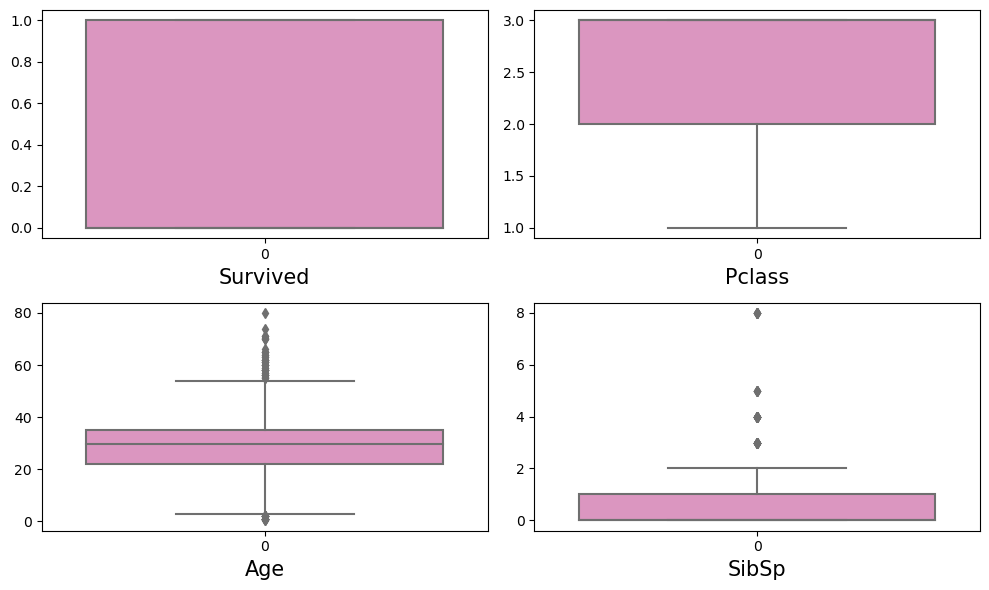

In [50]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette='Set2_r')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize= 10)
    plotnumber+=1
plt.tight_layout()

in the above boxplot it is showing in the features  'Age' and the 'SibSp' having outliers but for the age feature there is no sequence of values because we can have very much difference between the peoples age
that,s why according to our dataset it is not the outliers and 'SibSp' is a categorical feature because in this feature we have only 7 unique  values and we do not remove the outliers from the categorical variable 
so here we are considering our dataset is not having considerable outliers.

In [51]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


# Label Encoding on the categorical columns

In [52]:
lb=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=lb.fit_transform(df[i].values.reshape(-1,1))
        
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,108,1,22.000000,1,0,523,7.2500,47,2
1,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,1,3,353,0,26.000000,0,0,669,7.9250,47,2
3,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,0,3,15,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,27.000000,0,0,101,13.0000,47,2
887,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,0,3,413,0,29.699118,1,2,675,23.4500,47,2
889,1,1,81,1,26.000000,0,0,8,30.0000,60,0


we have converted the categorical features into the numerical features 

In [53]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Name        0.000000
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.787317
Cabin       2.268926
Embarked   -1.264823
dtype: float64

In [54]:
df['Cabin']=np.cbrt(df['Cabin'])

In [55]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Name        0.000000
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.787317
Cabin      -0.003317
Embarked   -1.264823
dtype: float64

redues the skewness from the titanic dataset

In [56]:
df.describe()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,3.703566,1.536476
std,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,0.505911,0.791503
min,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,3.608826,1.000000
50%,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,3.608826,2.000000
75%,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,3.608826,2.000000
max,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,5.265637,2.000000


now in this dataset we have all the numerical columns

# correlation between target variable and the independent variables

In [57]:
cor=df.corr()
cor

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,-0.057343,-0.543351,-0.069809,-0.035322,0.081629,-0.164549,0.257307,0.136096,-0.167675
Pclass,-0.338481,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,-0.137467,0.162098
Name,-0.057343,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,0.034889,-0.006117
Sex,-0.543351,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,-0.100565,0.108262
Age,-0.069809,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,0.009837,-0.026749
SibSp,-0.035322,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.013700,0.068230
Parch,0.081629,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,0.029347,0.039798
Ticket,-0.164549,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,-0.019449,-0.001729
Fare,0.257307,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,0.054829,-0.224719
Cabin,0.136096,-0.137467,0.034889,-0.100565,0.009837,0.013700,0.029347,-0.019449,0.054829,1.000000,0.050611


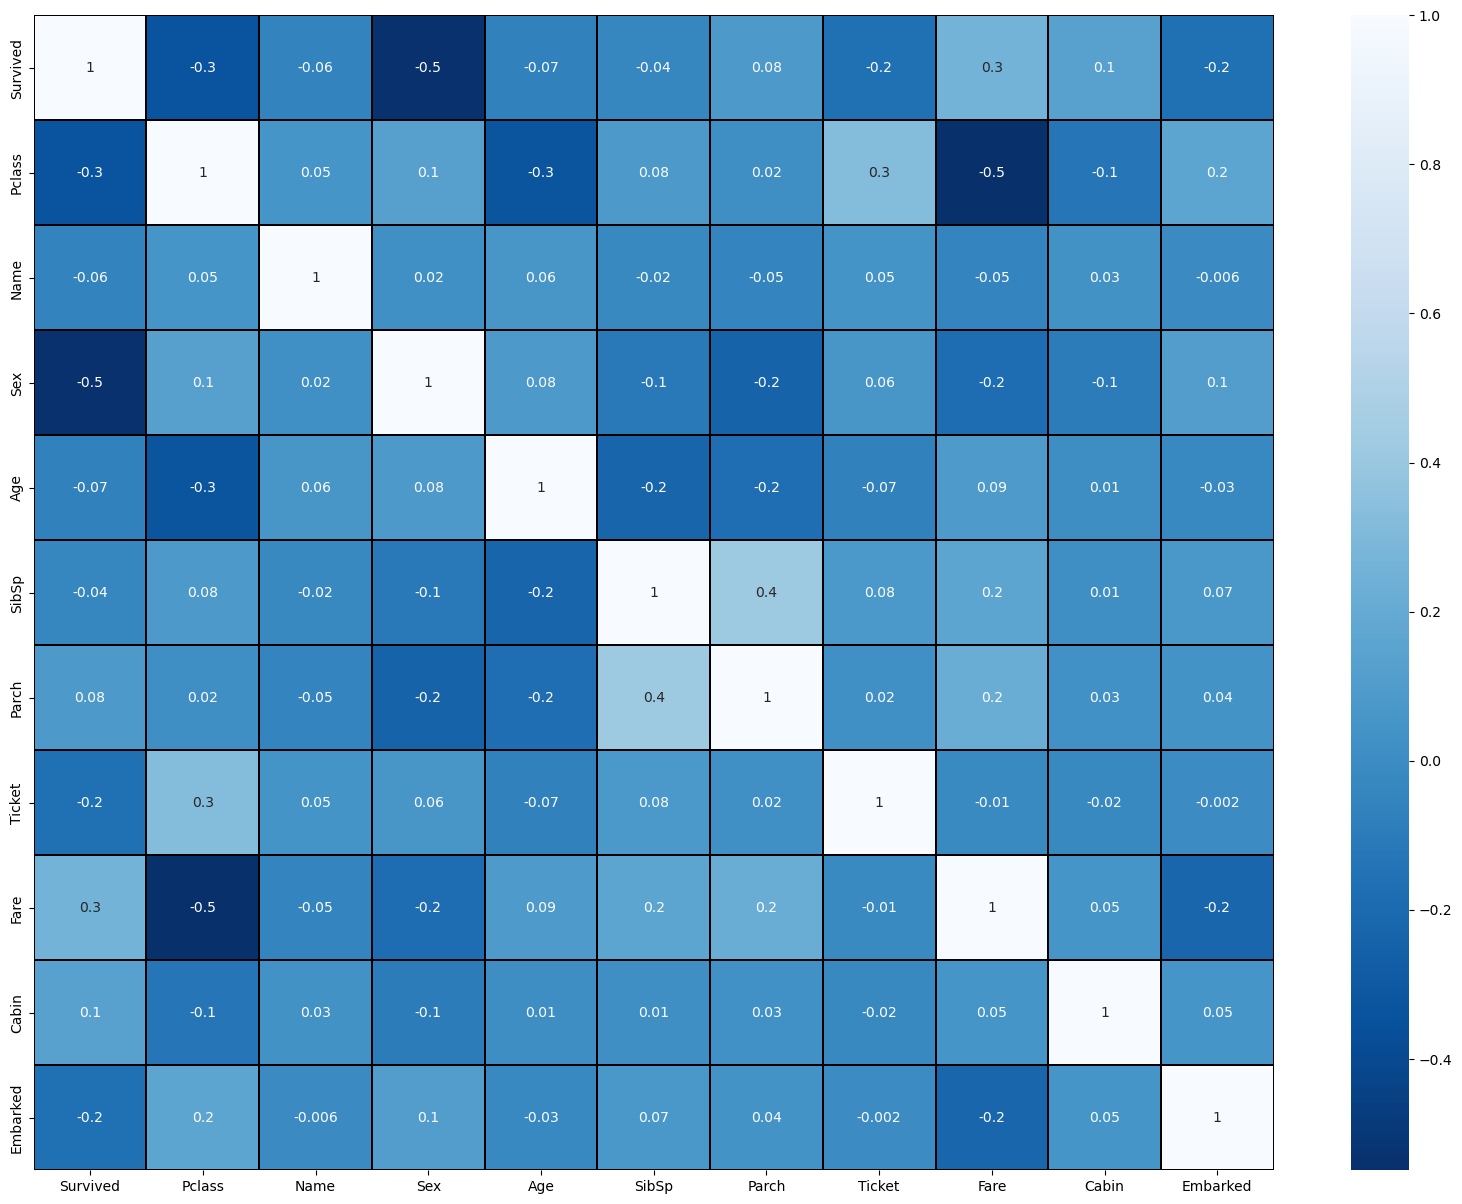

In [58]:
plt.figure(figsize=(20,15))
sns.heatmap(cor,linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.show()


there is no much positive correlation between target variable and features.

In [59]:
cor['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Cabin       0.136096
Parch       0.081629
SibSp      -0.035322
Name       -0.057343
Age        -0.069809
Ticket     -0.164549
Embarked   -0.167675
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

here we can see there is no much correlation between the target and the features by checking the values of the correlation

# separating features and label

In [60]:
x=df.drop('Survived',axis=1)
y=df['Survived']

# feature scaling using standard scaler 

In [61]:
sd=StandardScaler()
x=pd.DataFrame(sd.fit_transform(x),columns=x.columns)
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.827377,-1.310217,0.737695,-0.592481,0.432793,-0.473674,0.918966,-0.502445,-0.187372,0.585954
1,-1.566107,-0.991410,-1.355574,0.638789,0.432793,-0.473674,1.282625,0.786845,1.232494,-1.942303
2,0.827377,-0.357685,-1.355574,-0.284663,-0.474545,-0.473674,1.646283,-0.488854,-0.187372,0.585954
3,-1.566107,-0.672604,-1.355574,0.407926,0.432793,-0.473674,-1.442322,0.420730,0.196560,0.585954
4,0.827377,-1.671790,0.737695,0.407926,-0.474545,-0.473674,0.664904,-0.486337,-0.187372,0.585954
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,0.400452,0.737695,-0.207709,-0.474545,-0.473674,-1.183277,-0.386671,-0.187372,0.585954
887,-1.566107,-0.552079,-1.355574,-0.823344,-0.474545,-0.473674,-1.616678,-0.044381,-1.179395,0.585954
888,0.827377,-0.124412,-1.355574,0.000000,0.432793,2.008933,1.676173,-0.176263,-0.187372,0.585954
889,-1.566107,-1.415189,0.737695,-0.284663,-0.474545,-0.473674,-1.646568,-0.044381,0.417899,-1.942303


we have scaled the data using standard scalarization to overcome the issue of biasness

# Checking Variance inflation factor

In [62]:
# finding variance inflation factor in each scaled column

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['features']=x.columns
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif

,features,VIF values
0,Pclass,1.973497
1,Name,1.014213
2,Sex,1.118590
3,Age,1.217885
4,SibSp,1.284160
5,Parch,1.325605
6,Ticket,1.175522
7,Fare,1.719446
8,Cabin,1.039250
9,Embarked,1.087073


in the VIF  considerable values are present so we don,t need to drop any column we can perform the modeling with this dataset

In [63]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

here the data is not balanced here we are doing classification problem we can balance this dataset using the (SMOTE) method which is use for oversampling 

# SMOTE

In [64]:
sm=SMOTE()
x,y,=sm.fit_resample(x,y)

In [65]:
y.value_counts()

0    549
1    549
Name: Survived, dtype: int64

here we have done the oversampling method on our dataset

# modeling 

In [66]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is',maxAccu,'at random_state',maxRS)

Best accuracy is 0.8909090909090909 at random_state 38


# creating train test split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Decision Tree Classifier

In [68]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,dtc_pred))
print('confusion_matrix',confusion_matrix(y_test,dtc_pred))
print('classification_report',classification_report(y_test,dtc_pred))

accuracy_score 0.8121212121212121
confusion_matrix [[120  38]
 [ 24 148]]
classification_report               precision    recall  f1-score   support

           0       0.83      0.76      0.79       158
           1       0.80      0.86      0.83       172

    accuracy                           0.81       330
   macro avg       0.81      0.81      0.81       330
weighted avg       0.81      0.81      0.81       330



# SVC Classifier

In [69]:
svc=SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,svc_pred))
print('confusion_matrix',confusion_matrix(y_test,svc_pred))
print('classification_report',classification_report(y_test,svc_pred))


accuracy_score 0.8515151515151516
confusion_matrix [[139  19]
 [ 30 142]]
classification_report               precision    recall  f1-score   support

           0       0.82      0.88      0.85       158
           1       0.88      0.83      0.85       172

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330



# KNeighbors Classifier

In [70]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print('accuracy_score',accuracy_score(y_test,knn_pred))
print('confusion_matrix',confusion_matrix(y_test,knn_pred))
print('classification_report',classification_report(y_test,knn_pred))

accuracy_score 0.8454545454545455
confusion_matrix [[130  28]
 [ 23 149]]
classification_report               precision    recall  f1-score   support

           0       0.85      0.82      0.84       158
           1       0.84      0.87      0.85       172

    accuracy                           0.85       330
   macro avg       0.85      0.84      0.84       330
weighted avg       0.85      0.85      0.85       330



# Logistic Regression

In [71]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg_pred=lg.predict(x_test)
print('accuracy_score',accuracy_score(y_test,lg_pred))
print('confusion_matrix',confusion_matrix(y_test,lg_pred))
print('classification_report',classification_report(y_test,lg_pred))

accuracy_score 0.8212121212121212
confusion_matrix [[130  28]
 [ 31 141]]
classification_report               precision    recall  f1-score   support

           0       0.81      0.82      0.82       158
           1       0.83      0.82      0.83       172

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



# Random Forest Classifier

In [72]:
rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
print('accuracy_score',accuracy_score(y_test,rfr_pred))
print('confusion_report',confusion_matrix(y_test,rfr_pred))
print('classification_report',classification_report(y_test,rfr_pred))

accuracy_score 0.8878787878787879
confusion_report [[143  15]
 [ 22 150]]
classification_report               precision    recall  f1-score   support

           0       0.87      0.91      0.89       158
           1       0.91      0.87      0.89       172

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.89      0.89      0.89       330



# Extra Trees Classifier

In [73]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred=etc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,etc_pred))
print('confusion_matrix',confusion_matrix(y_test,etc_pred))
print('classification_report',classification_report(y_test,etc_pred))

accuracy_score 0.8848484848484849
confusion_matrix [[142  16]
 [ 22 150]]
classification_report               precision    recall  f1-score   support

           0       0.87      0.90      0.88       158
           1       0.90      0.87      0.89       172

    accuracy                           0.88       330
   macro avg       0.88      0.89      0.88       330
weighted avg       0.89      0.88      0.88       330



# Ada Boost Classifier

In [74]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred=abc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,abc_pred))
print('confusion_matrix',confusion_matrix(y_test,abc_pred))
print('classification_report',classification_report(y_test,abc_pred))

accuracy_score 0.8545454545454545
confusion_matrix [[134  24]
 [ 24 148]]
classification_report               precision    recall  f1-score   support

           0       0.85      0.85      0.85       158
           1       0.86      0.86      0.86       172

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330



# Gradient Boosting Classifier

In [75]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred=gbc.predict(x_test)
print('accuracy_score',accuracy_score(y_test,gbc_pred))
print('confusion_matrix',confusion_matrix(y_test,gbc_pred))
print('classification_report',classification_report(y_test,gbc_pred))

accuracy_score 0.8878787878787879
confusion_matrix [[139  19]
 [ 18 154]]
classification_report               precision    recall  f1-score   support

           0       0.89      0.88      0.88       158
           1       0.89      0.90      0.89       172

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.89      0.89      0.89       330



In [77]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
BC_pred=BC.predict(x_test)
print('accuracy_score',accuracy_score(y_test,BC_pred))
print('confusion_matrix',confusion_matrix(y_test,BC_pred))
print('classification_report',classification_report(y_test,BC_pred))

accuracy_score 0.8424242424242424
confusion_matrix [[138  20]
 [ 32 140]]
classification_report               precision    recall  f1-score   support

           0       0.81      0.87      0.84       158
           1       0.88      0.81      0.84       172

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



# cross validation score

In [79]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print('difference between cross validation score and accuracy score',(accuracy_score(y_test,svc_pred)-score.mean())*100)

[0.78636364 0.81818182 0.80909091 0.85388128 0.86757991]
0.8270195101701951
difference between cross validation score and accuracy score 2.449564134495641


In [82]:
score1=cross_val_score(dtc,x,y,cv=5)
print(score1)
print(score1.mean())
print('difference between cross validation score and accuracy score',(accuracy_score(y_test,dtc_pred)-score1.mean())*100)

[0.79545455 0.77727273 0.77272727 0.81278539 0.85844749]
0.8033374844333748
difference between cross validation score and accuracy score 0.8783727687837306


In [83]:
score2=cross_val_score(knn,x,y,cv=5)
print(score2)
print(score2.mean())
print('difference between cross validation score and accuracy score',(accuracy_score(y_test,knn_pred)))

[0.77272727 0.83181818 0.84090909 0.84474886 0.84931507]
0.827903694479037
difference between cross validation score and accuracy score 0.8454545454545455


In [85]:
score3=cross_val_score(lg,x,y,cv=5)
print(score3)
print(score3.mean())
print('difference between cross validation and accuracy score',(accuracy_score(y_test,lg_pred)-score3.mean())*100)

[0.76818182 0.80454545 0.77727273 0.80821918 0.8173516 ]
0.7951141552511416
difference between cross validation and accuracy score 2.6097965960979574


In [86]:
score4=cross_val_score(rfr,x,y,cv=5)
print(score4)
print(score4.mean())
print('difference between cross validation and accuracy score',(accuracy_score(y_test,rfr_pred)-score4.mean())*100)

[0.80909091 0.85909091 0.82727273 0.90410959 0.89497717]
0.8589082606890827
difference between cross validation and accuracy score 2.8970527189705275


In [87]:
score5=cross_val_score(etc,x,y,cv=5)
print(score5)
print(score5.mean())
print('difference between cross validation and accuracy score',(accuracy_score(y_test,etc_pred)-score5.mean())*100)

[0.80909091 0.85       0.81363636 0.88584475 0.91780822]
0.8552760481527605
difference between cross validation and accuracy score 2.9572436695724402


In [88]:
score6=cross_val_score(abc,x,y,cv=5)
print(score6)
print(score6.mean())
print('difference between cross validation and accuracy score',(accuracy_score(y_test,abc_pred)-score6.mean())*100)

[0.79090909 0.79545455 0.78181818 0.80821918 0.83105023]
0.8014902449149025
difference between cross validation and accuracy score 5.3055209630552


In [89]:
score7=cross_val_score(gbc,x,y,cv=5)
print(score7)
print(score7.mean())
print('difference between cross validaton score and accuracy score',(accuracy_score(y_test,gbc_pred)-score7.mean())*100)

[0.78636364 0.85909091 0.81363636 0.88584475 0.87214612]
0.8434163553341636
difference between cross validaton score and accuracy score 4.446243254462434


In [90]:
score8=cross_val_score(BC,x,y,cv=5)
print(score8)
print(score8.mean())
print('difference between cross validation  score and accuracy score',(accuracy_score(y_test,BC_pred)-score8.mean())*100)

[0.78636364 0.85454545 0.83636364 0.89041096 0.9086758 ]
0.855271897052719
difference between cross validation  score and accuracy score -1.284765462847659


Random Forest Classifier is our best performing model it is giving high Accuracy and low difference between the cross validation and accuracy score

# Hyper Parameter Tunning

In [93]:
# random forest classifier
parameters=({'n_estimators':[100,50,60,70],
            'max_depth':[100,50,40,30],
            'criterion':['gini','entropy'],
            'max_features':['sqrt']})

model=RandomForestClassifier()

In [94]:
grid=GridSearchCV(model,parameters,cv=5)


In [95]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [100, 50, 40, 30],
                         'max_features': ['sqrt'],
                         'n_estimators': [100, 50, 60, 70]})

In [96]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 'sqrt',
 'n_estimators': 70}

In [98]:
Final_model=RandomForestClassifier(criterion='gini',max_depth=50,max_features='sqrt',n_estimators=50)
Final_model.fit(x_train,y_train)
Final_pred=Final_model.predict(x_test)
print('accuracy_score',accuracy_score(y_test,Final_pred))
print('confusion_matrix',confusion_matrix(y_test,Final_pred))
print('classification_report',classification_report(y_test,Final_pred))


accuracy_score 0.9030303030303031
confusion_matrix [[143  15]
 [ 17 155]]
classification_report               precision    recall  f1-score   support

           0       0.89      0.91      0.90       158
           1       0.91      0.90      0.91       172

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330



In [99]:
Final_model1=RandomForestClassifier(criterion='entropy',max_depth=100,max_features='sqrt',n_estimators=70)
Final_model1.fit(x_train,y_train)
final_pred=Final_model1.predict(x_test)
print('accuracy score',accuracy_score(y_test,final_pred))
print('confusion matrix',confusion_matrix(y_test,final_pred))
print('classification_report',classification_report(y_test,final_pred))

accuracy score 0.8909090909090909
confusion matrix [[143  15]
 [ 21 151]]
classification_report               precision    recall  f1-score   support

           0       0.87      0.91      0.89       158
           1       0.91      0.88      0.89       172

    accuracy                           0.89       330
   macro avg       0.89      0.89      0.89       330
weighted avg       0.89      0.89      0.89       330



our first final model is working well it id giving high accuracy score than the second one so we will save our first model with accuracy of (0.903030)

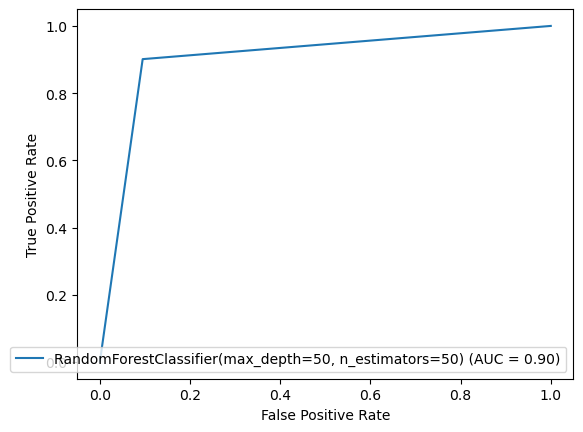

In [104]:
fpr,tpr,threshold=metrics.roc_curve(y_test,Final_pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

In [105]:
# saving the model
import joblib
joblib.dump(Final_model,'titanic_Analysis.pkl')

['titanic_Analysis.pkl']

predicting saved model

In [106]:
# loading the saved model for predictin the model again

model=joblib.load('titanic_Analysis.pkl')

# pred
prediction=model.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,

# this are the predicted values

In [107]:
a=np.array(y_test)
df=pd.DataFrame()
df['prediction']=prediction
df['original']=a
df

,prediction,original
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0
...,...,...
325,1,1
326,0,1
327,1,1
328,1,1


In [108]:
a=y_test